# USED CAR PRICE PREDICTION MODEL

In [1]:
# Importing Necessary Library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
# Modeling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.feature_selection import VarianceThreshold, chi2, mutual_info_regression
from sklearn.compose import ColumnTransformer
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import joblib
import xgboost

In [2]:
import sklearn
print(sklearn.__version__)
print(np.__version__)
print(pd.__version__)
print(xgboost.__version__)

1.2.2
1.26.4
2.2.3
2.0.3


In [3]:
# Load Data 
data = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')

# 1. DATA READING

In [4]:
data

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [5]:
data.shape

(188533, 13)

In [6]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [7]:
data['transmission'].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [8]:
data[(data.transmission.str.contains('Automatic')) | (data.transmission.str.contains('A/T'))]['transmission'].unique()

array(['A/T', '7-Speed A/T', '8-Speed A/T', '10-Speed Automatic',
       '1-Speed A/T', '6-Speed A/T', '10-Speed A/T', '9-Speed A/T',
       '8-Speed Automatic', '9-Speed Automatic', '5-Speed A/T',
       'Automatic', '7-Speed Automatic with Auto-Shift',
       '6-Speed Automatic', '4-Speed Automatic', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '8-Speed Automatic with Auto-Shift', '7-Speed Automatic',
       '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T',
       '10-Speed Automatic with Overdrive', '7-Speed DCT Automatic'],
      dtype=object)

In [9]:
data['brand'].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

In [10]:
data['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [11]:
data['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [12]:
data['accident'].describe()

count            186081
unique                2
top       None reported
freq             144514
Name: accident, dtype: object

In [13]:
data['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [14]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

# 2. DATA CLEANING

## Filling the missing Values

In [15]:
data.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [16]:
data['accident'].fillna('None reported' ,inplace = True)

/tmp/ipykernel_94/3972989972.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['accident'].fillna('None reported' ,inplace = True)


In [17]:
data.shape

(188533, 13)

In [18]:
data['clean_title'].fillna('No',inplace = True)

/tmp/ipykernel_94/2653428194.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['clean_title'].fillna('No',inplace = True)


In [19]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [20]:
data['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [21]:
# fuel type contains three type of null value i.e.(nan, 'not supported','-')
# we can find the missing value of "fuel type" from their cars "engine" 
print("Number of cars having fuel_type == `nan` & engine != `electric`")
print(data[(data.fuel_type.isnull()) & (data.engine.apply(lambda x : 'Electric' not in x.split()))][['engine','fuel_type']].count())
print("_____________________________________________________________")
print("Number of cars having fuel_type == `nan` & engine == `electric`")
print(data[(data.fuel_type.isnull()) & (data.engine.apply(lambda x : 'Electric' in x.split()))][['engine','fuel_type']].count())

Number of cars having fuel_type == `nan` & engine != `electric`
engine       224
fuel_type      0
dtype: int64
_____________________________________________________________
Number of cars having fuel_type == `nan` & engine == `electric`
engine       4859
fuel_type       0
dtype: int64


In [22]:
data['fuel_type'] = data.apply(
    lambda row: 'Electric' if pd.isnull(row['fuel_type']) and all(feature in row['engine'].split() for feature in ('Electric', 'AH', 'Battery', 'Standard', 'kW'))
    else 'Plug-In Hybrid' if pd.isnull(row['fuel_type']) and all(feature in row['engine'].split() for feature in ('DOHC', 'Plug-In'))
    else 'Hybrid' if pd.isnull(row['fuel_type']) and 'Hybrid' in row['engine'].split()
    else 'E85 Flex Fuel' if pd.isnull(row['fuel_type']) and all(feature in row['engine'].split() for feature in ('Flex', 'Flexible'))
    else 'Diesel' if pd.isnull(row['fuel_type']) and 'Diesel' in row['engine'].split()
    else 'Gasoline' if pd.isnull(row['fuel_type'])  # Use Gasoline if fuel_type is null
    else row['fuel_type'],  # Retain original value if not null
    axis=1
)

In [23]:
#Now lets check how many value of fuel_type == "-"
print("fuel_type and engine both `-`")
print(data[(data.fuel_type == '–') & (data.engine == '–') ][['engine','fuel_type']].count())
print("______________________________________")
print("Only fuel_type `-`")
print(data[(data.fuel_type == '–') & (data.engine != '–') ][['engine','fuel_type']].count())

fuel_type and engine both `-`
engine       772
fuel_type    772
dtype: int64
______________________________________
Only fuel_type `-`
engine       9
fuel_type    9
dtype: int64


In [24]:
# Replacing '–' with 'Unknown' for both fuel_type and engine where both are '-'
data.loc[(data['fuel_type'] == '–') & (data['engine'] == '–'), ['fuel_type', 'engine']] = 'Unknown'

In [25]:
data['fuel_type'].replace('–', 'Gasoline', inplace=True) # manually checked 

/tmp/ipykernel_94/3693100997.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['fuel_type'].replace('–', 'Gasoline', inplace=True) # manually checked


In [26]:
data[data.fuel_type == 'not supported'][['engine','fuel_type']]

,engine,fuel_type
4823,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,not supported
18000,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,not supported
19182,182.0HP Electric Motor Hydrogen Fuel,not supported
27199,175.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,not supported
33030,182.0HP Electric Motor Hydrogen Fuel,not supported
60717,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,not supported
74096,182.0HP Electric Motor Hydrogen Fuel,not supported
86897,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,not supported
94425,550.0HP 4.8L 8 Cylinder Engine Gasoline Fuel,not supported
127066,151.0HP Electric Motor Hydrogen Fuel,not supported


In [27]:
#As every engine here is gasoline and electric we can manually change this
data['fuel_type'] = data.apply(
                                lambda row : 'Gasoline' if any(keyword in row['engine'] for keyword in ['Gasoline', 'L', 'Liter']) else 'Electric'
                                if row['fuel_type']=='not supported' else row['fuel_type'],
                                axis = 1 )

In [28]:
data[data.fuel_type == 'not supported'][['engine','fuel_type']]

,engine,fuel_type


In [29]:
data.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [30]:
test.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

In [31]:
test['accident'].fillna('None reported',inplace = True)

/tmp/ipykernel_94/780368835.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['accident'].fillna('None reported',inplace = True)


In [32]:
#test[test['fuel_type'].isna()].head(500)

In [33]:
test.fuel_type.unique()

array(['Gasoline', 'Hybrid', 'Diesel', 'E85 Flex Fuel', nan,
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [34]:
test[test.fuel_type == 'Gasoline']['engine'].head(10)

0      240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
2                   3.5L V6 24V PDI DOHC Twin Turbo
3                                    2.0 Liter TFSI
4      252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
5      285.0HP 4.8L 8 Cylinder Engine Gasoline Fuel
6     270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel
7                              3.8L V6 24V GDI DOHC
8      536.0HP 5.5L 8 Cylinder Engine Gasoline Fuel
9     365.0HP 3.3L V6 Cylinder Engine Gasoline Fuel
10    303.0HP 3.7L V6 Cylinder Engine Gasoline Fuel
Name: engine, dtype: object

In [35]:
test['fuel_type'] = test.apply(
    lambda row: 'Electric' if pd.isnull(row['fuel_type']) and all(feature in row['engine'].split() for feature in ('Electric', 'AH', 'Battery', 'Standard', 'kW'))
    else 'Plug-In Hybrid' if pd.isnull(row['fuel_type']) and all(feature in row['engine'].split() for feature in ('DOHC', 'Plug-In'))
    else 'Hybrid' if pd.isnull(row['fuel_type']) and 'Hybrid' in row['engine'].split()
    else 'E85 Flex Fuel' if pd.isnull(row['fuel_type']) and all(feature in row['engine'].split() for feature in ('Flex', 'Flexible'))
    else 'Diesel' if pd.isnull(row['fuel_type']) and 'Diesel' in row['engine'].split()
    else 'Gasoline' if pd.isnull(row['fuel_type'])  # Use Gasoline if fuel_type is null
    else row['fuel_type'],  # Retain original value if not null
    axis=1
)

In [36]:
test[(test.fuel_type.isnull())][['engine','fuel_type']]

,engine,fuel_type


In [37]:
test[test.fuel_type == '–'][['engine','fuel_type']]

,engine,fuel_type
704,–,–
892,–,–
991,–,–
1008,–,–
1011,–,–
...,...,...
124669,–,–
124785,–,–
124879,–,–
125101,–,–


In [38]:
# Replace '–' with 'Unknown' for both fuel_type and engine where both are '-'
test.loc[(test['fuel_type'] == '–') & (test['engine'] == '–'), ['fuel_type', 'engine']] = 'Unknown'


In [39]:
test[(test.fuel_type == '–') ][['engine','fuel_type']]

,engine,fuel_type
12128,181.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,–
14867,250.0HP 5.9L Straight 6 Cylinder Engine Diesel...,–
16091,429.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,–
52090,2.5 Liter,–
54262,115.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,–
72030,245.0HP 5.9L Straight 6 Cylinder Engine Diesel...,–
76736,236.0HP 4.0L V6 Cylinder Engine Gasoline Fuel,–
80462,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,–
83074,560.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,–
91041,210.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,–


In [40]:
test['fuel_type'] = test.apply(
    lambda row: 'Gasoline' if (row['fuel_type'] == '–') and ('Gasoline' in row['engine'].split() and 'Liter' in row['engine'].split())
    else 'Diesel',
    axis=1
)

In [41]:
test['clean_title'].fillna('No',inplace = True)

/tmp/ipykernel_94/1362350193.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['clean_title'].fillna('No',inplace = True)


In [42]:
test.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

In [43]:
test.shape

(125690, 12)

## Removing Outlies

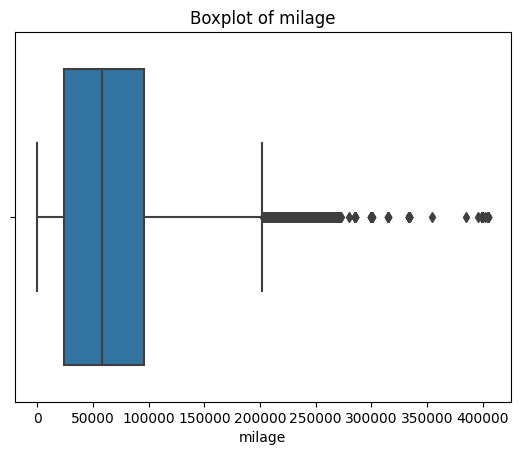

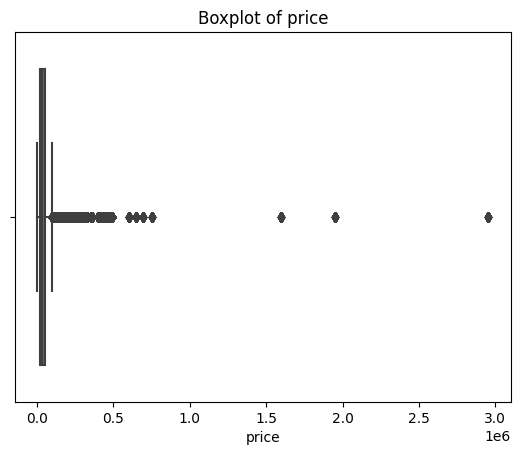

In [44]:
features = ['milage','price']
for feature in features :
    sns.boxplot(x = data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


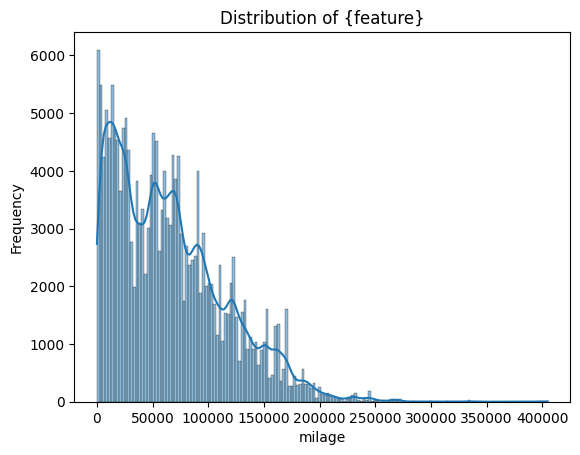

Skewness: 0.8950620098363095


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


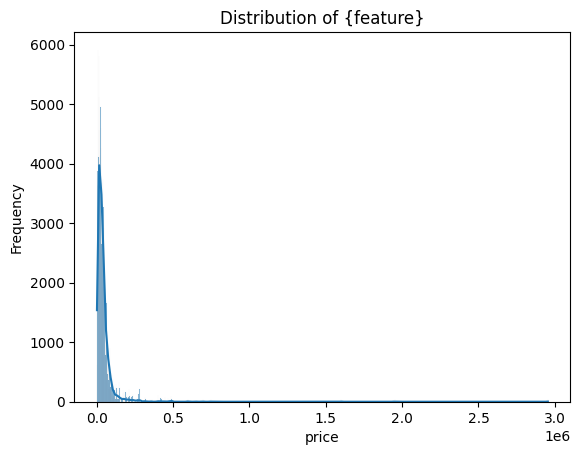

Skewness: 20.268452710951134


In [45]:
# defining the function that will plot and chck the skewness 
def skewness(data,features) :
    for feature in features :
        #plot of feature
        sns.histplot(data[feature],kde=True)
        plt.title('Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()
        # Calculate skewness
        skewness = data[feature].skew()
        print(f'Skewness: {skewness}')
        print('='*60)
skewness(data,features)

In [46]:
# Removing the Outliers
numerical_data = ['price','milage']
def outlier(df,ft) :
    upper_limit = df[ft].mean() + 3*df[ft].std()
    lower_limit = df[ft].mean() - 3*df[ft].std()
    ls =  df.index[(df[ft] < lower_limit) | (df[ft] > upper_limit)]
    return ls
index = []
for col in numerical_data :
    index.extend(outlier(data,col))
index = sorted(set(index))
def remove_outlier(df,ls) :
    df = df.drop(ls,inplace = True)
    return df 
remove_outlier(data,index)


# 3. DATA VISUALIZATION

### Q1: which is the most expensive cars in this data ?

<Axes: xlabel='brand', ylabel='price'>

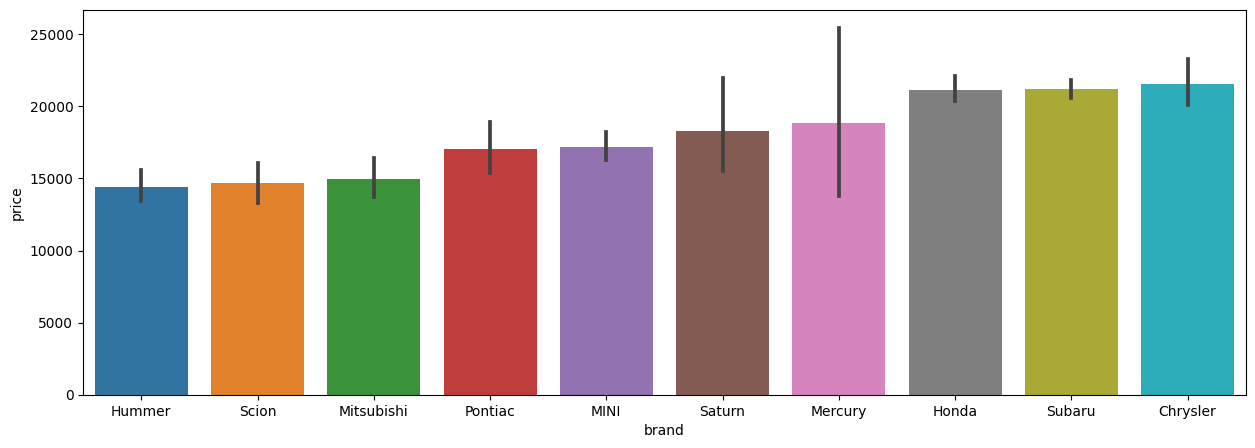

In [47]:
plt.figure(figsize=(15,5))
brand_order = data.groupby('brand')['price'].mean().sort_values(ascending = True).head(10).index
sns.barplot(data=data , x='brand' ,y='price',order = brand_order)

**Cheysler, Sabaru,Honda, Mercury, Saturn are the top 5 Expensive Brand**

### Q2: Who are the Top Manufactures?

<Axes: xlabel='brand', ylabel='count'>

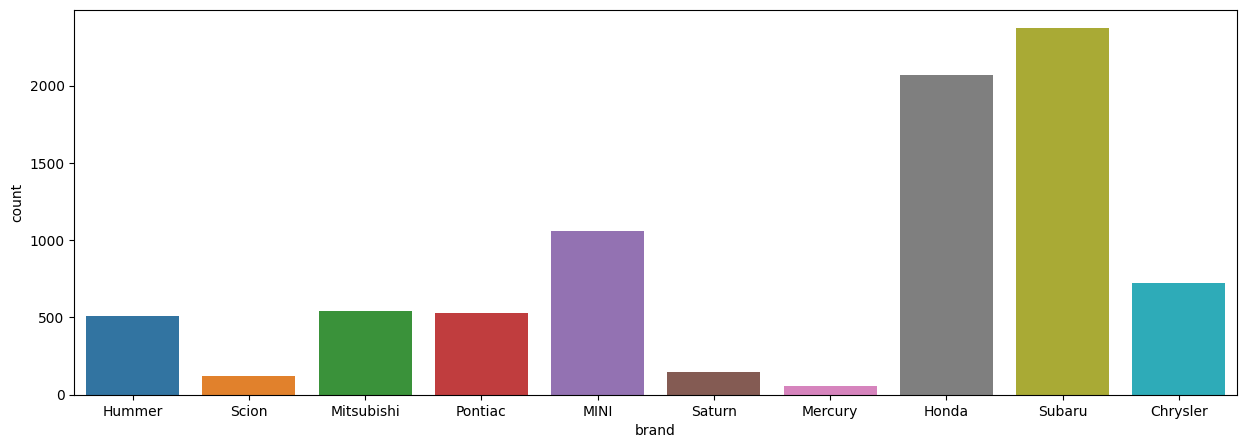

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(data=data , x='brand' ,order = brand_order)



**Mazda Manufactures the most number of cars**

**Pontiac number of cars are low still in fourth place interms of expensive cars(mean of all models) this implies that Pontiac manufactures low but expensive cars**



### Q3: Does Model Year have any effect on Pricing of the car ?

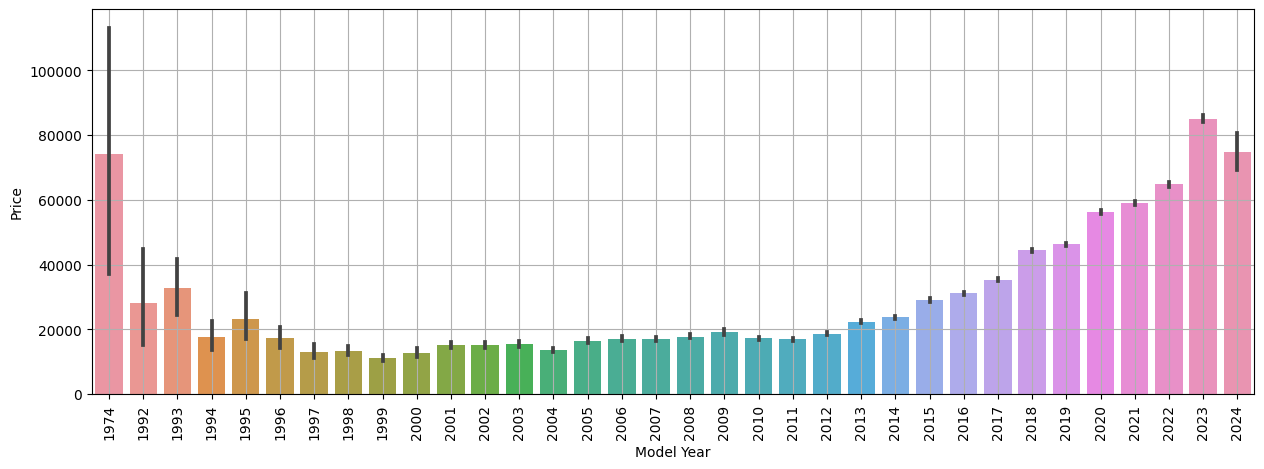

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(data=data , x='model_year',y='price' )
plt.grid()
plt.xticks( rotation = 'vertical')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

**It can be seen that older vintage cars are high in value i.e it has many outliers**

### Q4: How High Milage effects the pricing of the car ?

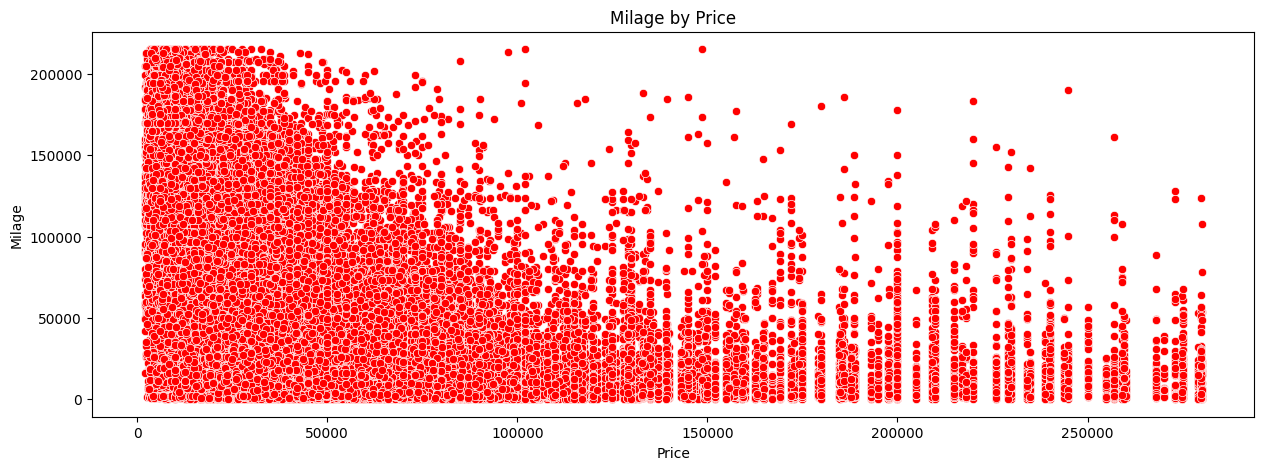

In [50]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,y='milage' , x='price' , color = 'r' )
plt.title('Milage by Price')
plt.xlabel('Price')
plt.ylabel('Milage')
plt.show()

**it can be seen that no expensive used car has high milage i.e mostly milage is inversely correlated with Price of the car**

 ### Q5: What fuel type most the cars is using ? 

Text(0.5, 1.0, 'Count of Car Fuel type')

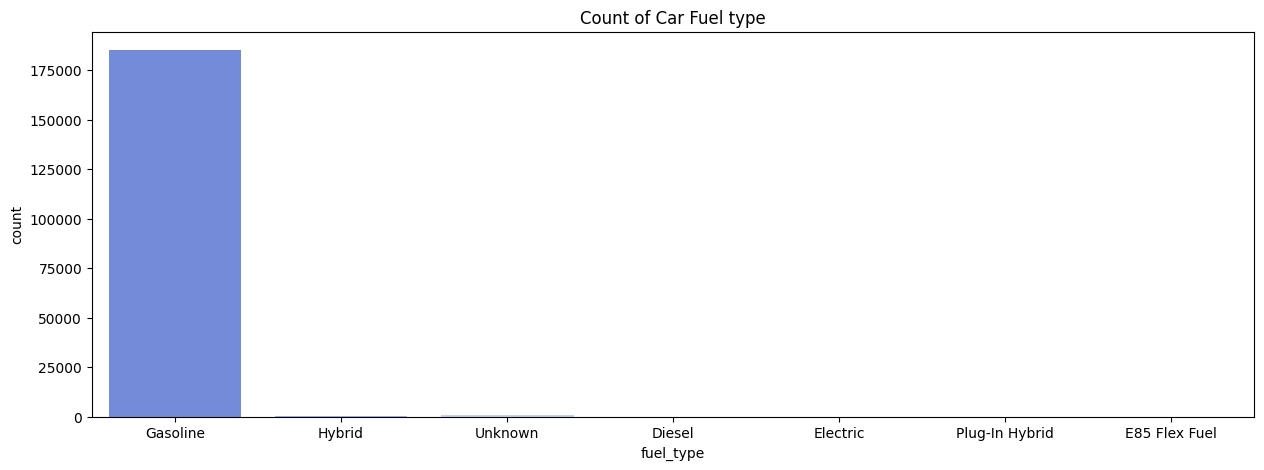

In [51]:
plt.figure(figsize=(15,5))
sns.countplot(data=data,x='fuel_type',palette = 'coolwarm')
plt.title('Count of Car Fuel type')

Text(0, 0.5, 'Milage')

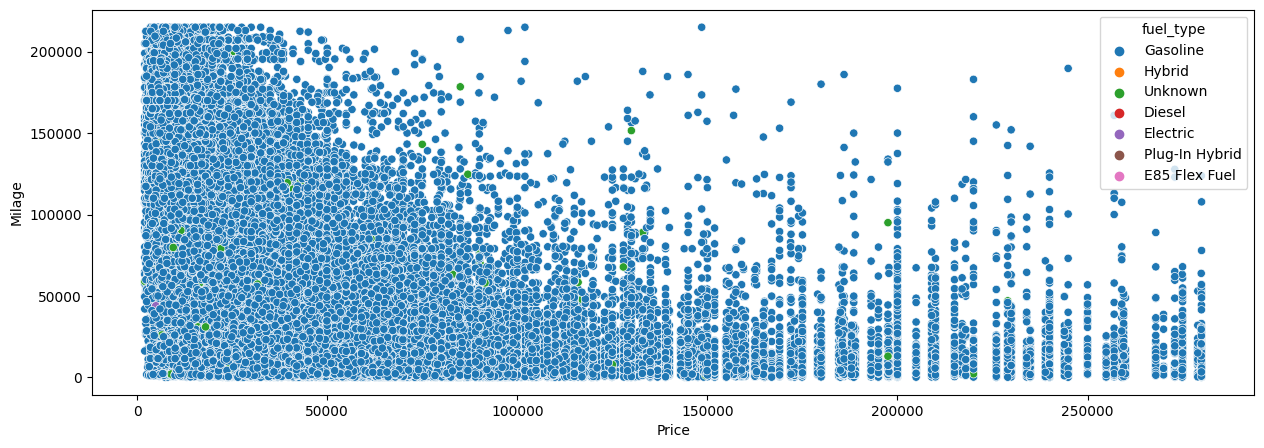

In [52]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,y='milage' , x='price' ,hue='fuel_type')
plt.xlabel('Price')
plt.ylabel('Milage')

**Most of the car have gasoline as fuel type**

### Q6: How many cars has meets the accident , which brands have reported the highest accident ?

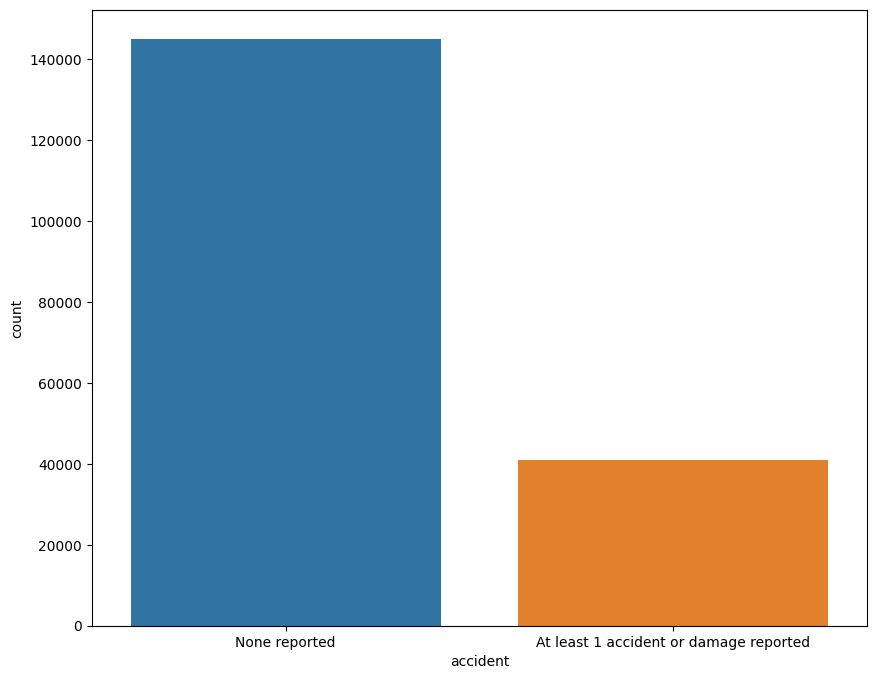

In [53]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=data,x='accident')

Text(0, 0.5, 'Count')

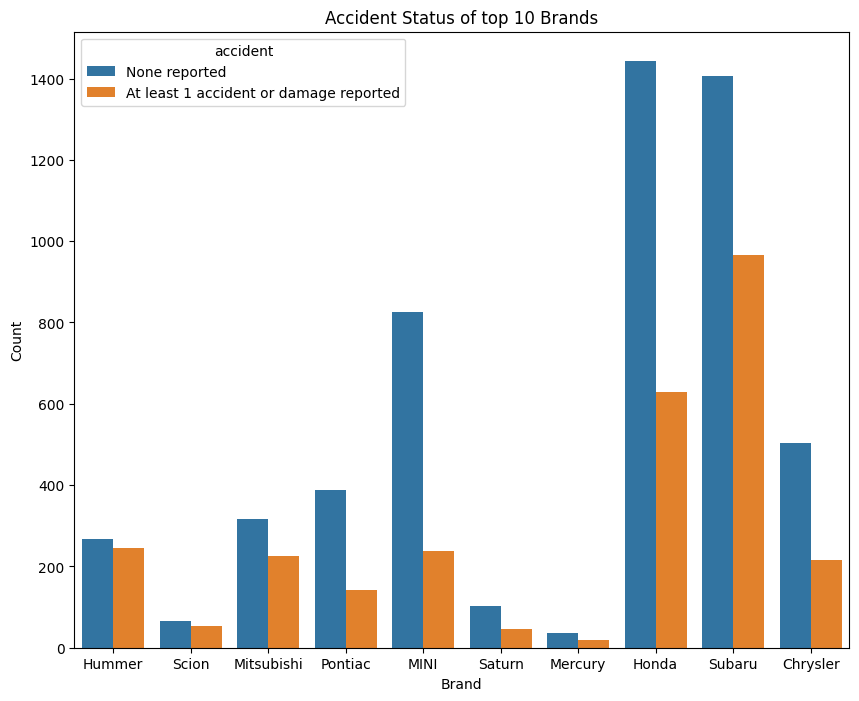

In [54]:
plt.figure(figsize=(10,8))
sns.countplot(data=data , x='brand' , hue='accident', order = brand_order)
plt.title('Accident Status of top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Count')

**It can be seen most Hyundai, Mazda, Honda, Subaru cars meet the most of accident which is completely normal as also these brands manufacture the most number of cars.**

<Axes: xlabel='clean_title', ylabel='count'>

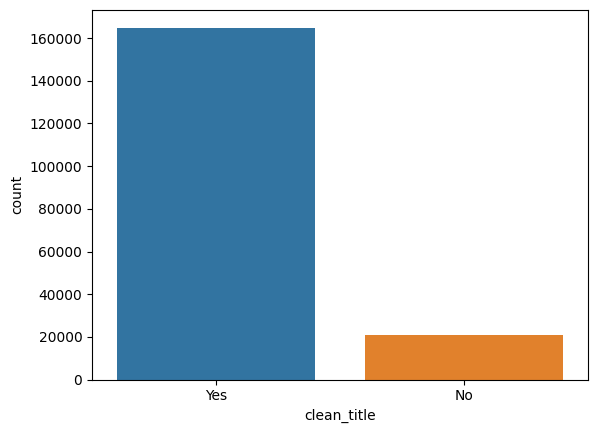

In [55]:
sns.countplot(data=data , x = 'clean_title')

# 4. FEATURE ENGINEERING

## Tranmission Type


* **Extracting information from Transmission column**
* **Here from transmission we can extract type of transmission('automatic','manual','other') and number of gears in a car**


In [56]:
data['transmission'].head(10)

0                               A/T
1                               A/T
2                               A/T
3    Transmission w/Dual Shift Mode
4                       7-Speed A/T
5                               A/T
6                       8-Speed A/T
7                               A/T
8                10-Speed Automatic
9    Transmission w/Dual Shift Mode
Name: transmission, dtype: object

In [57]:
#this function will extract transmission type
def transmission_type(trans) :
    if 'Automatic' in trans or 'A/T' in  trans :
        return 'Automatic'
    elif 'Manual' in trans or 'M/T' in trans :
        return 'Manual'
    else :
        return 'Other'
import re
#this function will extract Number of gears
def gear(trans) :
    match = re.search(r'(\d+)-Speed',trans)
    if match : 
        return int(match.group(1))
    else :
        return np.nan
data['trans_type'] = data['transmission'].apply(transmission_type)
data['gear'] = data['transmission'].apply(gear)

In [58]:
#applying this to test as well
test['trans_type'] = test['transmission'].apply(transmission_type)
test['gear'] = test['transmission'].apply(gear)

In [59]:
data.groupby(['brand', 'model', 'trans_type','fuel_type']).gear.value_counts().head(5)

brand  model                  trans_type  fuel_type  gear
Acura  330 i xDrive           Automatic   Gasoline   6.0     1
       ATS 2.0L Turbo Luxury  Automatic   Gasoline   8.0     1
       Acadia SLE-1           Automatic   Gasoline   9.0     1
       Air Pure               Automatic   Gasoline   1.0     1
       CC Sport               Manual      Gasoline   6.0     1
Name: count, dtype: int64

## Engine Details


* **Extracting Information from Engine Column**
* **from column engine we can extract three features i.e. horsepower, engine_size, Number of Cylinders**


In [60]:
import re 
def extract_engine_features(raw) :
    engine_info = raw['engine']
    
    #Extracting HorsePower of Car
    hp_match = re.search(r'(\d+\.?\d*)HP' , engine_info)
    horsepower = float(hp_match.group(1)) if hp_match else None
    
    #Extracting Engine Size of Car
    size_match = re.search(r'(\d+\.?\d*)L' , engine_info)
    engine_size = float(size_match.group(1)) if size_match else 0
    
    #Extracting Cylinders in Car
    cyl_match = re.search(r'(\d+)\s+Cylinder|V(\d+)' , engine_info)
    cylinders = int(cyl_match.group(1) or cyl_match.group(2)) if cyl_match else None
    
    return pd.Series([horsepower, engine_size, cylinders])
data[['horsepower', 'engine_size', 'cylinders']] = data.apply(extract_engine_features, axis=1)

In [61]:
test[['horsepower', 'engine_size', 'cylinders']] = test.apply(extract_engine_features, axis=1)

In [62]:
data.head(
)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,trans_type,gear,horsepower,engine_size,cylinders
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,Automatic,NaN,172.0,1.6,4.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,Automatic,NaN,252.0,3.9,8.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,Gasoline,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,Automatic,NaN,320.0,5.3,8.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,Other,NaN,420.0,5.0,8.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,Automatic,7.0,208.0,2.0,4.0


### Filling missing value of new features

In [63]:
print(f'Null values in data: \n{data.isnull().sum()}')
print("_____________________________________")
print(f'Null values in test: \n{test.isnull().sum()}')

Null values in data: 
id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type           0
engine              0
transmission        0
ext_col             0
int_col             0
accident            0
clean_title         0
price               0
trans_type          0
gear            83348
horsepower      32630
engine_size         0
cylinders       21529
dtype: int64
_____________________________________
Null values in test: 
id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type           0
engine              0
transmission        0
ext_col             0
int_col             0
accident            0
clean_title         0
trans_type          0
gear            56189
horsepower      22181
engine_size         0
cylinders       14529
dtype: int64


In [64]:
data[data.cylinders.isnull()][['engine']].head() #awcs we cannot get any data from ENGINEs detail

,engine
11,Electric Motor Electric Fuel System
32,518.0HP Electric Motor Electric Fuel System
44,835.0HP Electric Motor Electric Fuel System
51,Dual Motor - Standard
52,518.0HP Electric Motor Electric Fuel System



**as we know a specific engines model with specific 'engine size' & 'number of cylinder' will produce same 'HORSEPOWER'so we will use this theory to fill the null value of horsepower incase a specific engine create different hp then we will fill the mode**


In [65]:
 data.groupby(['brand','model','engine_size','cylinders']).horsepower.value_counts().head(20)

brand  model                       engine_size  cylinders  horsepower
Acura  300 Touring                 3.5          6.0        250.0          1
       330 i xDrive                3.0          6.0        320.0          1
       335 is                      3.0          6.0        320.0          1
       ATS 2.0L Turbo Luxury       2.0          4.0        252.0          1
       CC Sport                    2.4          4.0        201.0          1
       CLK-Class CLK 350           3.5          6.0        268.0          2
       CX-30 Base                  2.0          4.0        200.0          1
       Cascada Base                2.0          4.0        200.0          1
       Corvette Stingray w/1LT     6.2          8.0        490.0          1
       ES 350 Base                 3.5          6.0        268.0          1
       Forte LXS                   2.0          4.0        147.0          1
       ILX 2.0L w/Premium Package  2.0          4.0        150.0         24
                  

In [66]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
data['horsepower']=data.groupby(['brand','model','engine_size','cylinders']).horsepower.transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
test['horsepower']=test.groupby(['brand','model','engine_size','cylinders']).horsepower.transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [67]:
data['cylinders']=data.groupby(['brand','model','engine_size','horsepower']).cylinders.transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
test['cylinders']=test.groupby(['brand','model','engine_size','horsepower']).cylinders.transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [68]:
data['gear'] = data.groupby(['brand', 'model', 'trans_type','fuel_type'])['gear'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
test['gear'] = test.groupby(['brand', 'model', 'trans_type','fuel_type'])['gear'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [69]:
data.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type           0
engine              0
transmission        0
ext_col             0
int_col             0
accident            0
clean_title         0
price               0
trans_type          0
gear            21658
horsepower      23348
engine_size         0
cylinders       23348
dtype: int64

In [70]:
print(f'percent of null "gear" left:  \n{data.gear.isnull().sum()/data.shape[0]*100}')
print('_________________________________')
print(f'percent of null "cylinders" left:  \n{data.cylinders.isnull().sum()/data.shape[0]*100}')
print('_________________________________')
print(f'percent of null "horsepower" left:  \n{data.horsepower.isnull().sum()/data.shape[0]*100}')

percent of null "gear" left:  
11.642834103859801
_________________________________
percent of null "cylinders" left:  
12.551338565745617
_________________________________
percent of null "horsepower" left:  
12.551338565745617


### Creating model to fill all other missing value

**Fillling HorsePower**

In [71]:
# Fill remaining NaN values for horsepower using a predictive model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# Subset data into complete and incomplete cases
complete_hp = data[(data['horsepower'].notnull()) ]
incomplete_hp = data[(data['horsepower'].isnull())]

# Train the model on complete data
X_train_hp = pd.get_dummies(complete_hp[['engine_size','brand','model_year','trans_type']],drop_first =True,dtype = int)
y_train_hp = complete_hp['horsepower']


#cross_val_score(RandomForestRegressor(),X_train_hp, y_train_hp,cv=5)

In [72]:
model_hp = RandomForestRegressor()
model_hp.fit(X_train_hp, y_train_hp)

# Predict missing horsepower values
X_null_hp = pd.get_dummies(incomplete_hp[['engine_size', 'brand', 'model_year','trans_type']],drop_first = True , dtype =int)
X_null_hp = X_null_hp.reindex(columns=X_train_hp.columns, fill_value=0) #reindex(..., fill_value=0) ensures all required features exist, even if they weren't in X_null_hp.
data.loc[data['horsepower'].isnull(), 'horsepower'] = model_hp.predict(X_null_hp)

incomplete_test_hp = test[(test['horsepower'].isnull())]
X2_null_hp = pd.get_dummies(incomplete_test_hp[['engine_size', 'brand', 'model_year','trans_type']],drop_first = True , dtype =int)
X2_null_hp = X2_null_hp.reindex(columns=X_train_hp.columns, fill_value=0)
test.loc[test['horsepower'].isnull(), 'horsepower'] = model_hp.predict(X2_null_hp)

**Filling Cylinders**

In [73]:
# Fill remaining NaN values for Cylinders using a predictive model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# Subset data into complete and incomplete cases
complete_cy = data[(data['cylinders'].notnull()) ]
incomplete_cy = data[(data['cylinders'].isnull())]

# Train the model on complete data
X_train_cy = pd.get_dummies(complete_cy[['engine_size','brand','model_year','trans_type','horsepower']],drop_first =True,dtype = int)
y_train_cy = complete_cy['cylinders']


#cross_val_score(RandomForestRegressor(),X_train_hp, y_train_hp,cv=5)

In [74]:
model_cy = RandomForestRegressor()
model_cy.fit(X_train_cy, y_train_cy)


# Predict missing cylinders values
X_null_cy = pd.get_dummies(incomplete_cy[['engine_size', 'brand', 'model_year','trans_type','horsepower']],drop_first = True , dtype =int)
X_null_cy = X_null_cy.reindex(columns=X_train_cy.columns, fill_value=0)
data.loc[data['cylinders'].isnull(), 'cylinders'] = model_cy.predict(X_null_cy)

incomplete_test_cy = test[(test['cylinders'].isnull())]
X2_null_cy = pd.get_dummies(incomplete_test_cy[['engine_size', 'brand', 'model_year','trans_type','horsepower']],drop_first = True , dtype =int)
X2_null_cy = X2_null_cy.reindex(columns=X_train_cy.columns, fill_value=0)
test.loc[test['cylinders'].isnull(), 'cylinders'] = model_cy.predict(X2_null_cy)

**Filling Gears**

In [75]:
# Fill remaining NaN values for Gears using a predictive model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# Subset data into complete and incomplete cases
complete_g = data[(data['gear'].notnull()) ]
incomplete_g = data[(data['gear'].isnull())]

# Train the model on complete data
X_train_g = pd.get_dummies(complete_g[['engine_size','brand','model_year','trans_type','fuel_type','horsepower','cylinders',]],drop_first =True,dtype = int)
y_train_g = complete_g['gear']

# X_train, X_test, y_train, y_test = train_test_split(X_train_hp,y_train_hp,test_size=0.3)

#cross_val_score(RandomForestRegressor(),X_train, y_train,cv=5)

In [76]:
model_g = RandomForestRegressor()
model_g.fit(X_train_g, y_train_g)


# Predict missing gears values
X_null_g = pd.get_dummies(incomplete_g[['engine_size', 'brand', 'model_year','trans_type','horsepower','cylinders','fuel_type']],drop_first = True , dtype =int)
X_null_g = X_null_g.reindex(columns=X_train_g.columns, fill_value=0)
data.loc[data['gear'].isnull(), 'gear'] = model_g.predict(X_null_g)

incomplete_test_g = test[(test['gear'].isnull())]
X2_null_g = pd.get_dummies(incomplete_test_g[['engine_size', 'brand', 'model_year','trans_type','horsepower','cylinders','fuel_type']],drop_first = True , dtype =int)
X2_null_g = X2_null_g.reindex(columns=X_train_g.columns, fill_value=0)
test.loc[test['gear'].isnull(), 'gear'] = model_g.predict(X2_null_g)

In [77]:
data.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
trans_type      0
gear            0
horsepower      0
engine_size     0
cylinders       0
dtype: int64

In [78]:
data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,trans_type,gear,horsepower,engine_size,cylinders
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,Automatic,6.000000,172.0,1.6,4.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,Automatic,5.000000,252.0,3.9,8.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,Gasoline,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,Automatic,6.000000,320.0,5.3,8.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,Other,7.246122,420.0,5.0,8.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,Automatic,7.000000,208.0,2.0,4.0


# One Hot Encoding

**Merging Train & Test Table So that each table have same number of column after One-Hot-Encoding**

In [79]:
data['test_train'] =1
test['test_train'] =0
y = data["price"]
data = data.drop('price', axis = 1)
all_data = pd.concat([data,test])
all_data.head(1)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,trans_type,gear,horsepower,engine_size,cylinders,test_train
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,Automatic,6.0,172.0,1.6,4.0,1


In [80]:
all_dummies = pd.get_dummies(all_data[['brand','model_year','milage','fuel_type','ext_col','int_col','accident','clean_title','trans_type','gear','horsepower','engine_size','cylinders','test_train']],dtype = int)

In [81]:
all_dummies

,model_year,milage,gear,horsepower,engine_size,cylinders,test_train,brand_Acura,brand_Alfa,brand_Aston,...,int_col_White / Brown,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_No,clean_title_Yes,trans_type_Automatic,trans_type_Manual,trans_type_Other
0,2007,213000,6.000000,172.000000,1.6,4.0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,2002,143250,5.000000,252.000000,3.9,8.0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,2002,136731,6.000000,320.000000,5.3,8.0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,2017,19500,7.246122,420.000000,5.0,8.0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,2021,7388,7.000000,208.000000,2.0,4.0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,2014,83315,7.000000,362.000000,3.0,6.0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
125686,2019,29336,8.000000,153.376425,0.0,3.0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
125687,2012,77634,8.000000,333.000000,3.0,6.0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
125688,2012,112000,8.000000,333.000000,3.0,6.0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


# Feature Scaling

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness level of milage is 0.7014687358115502


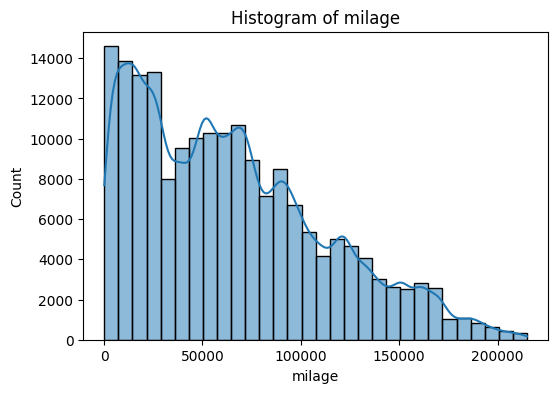

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness level of gear is -0.7681209550710492


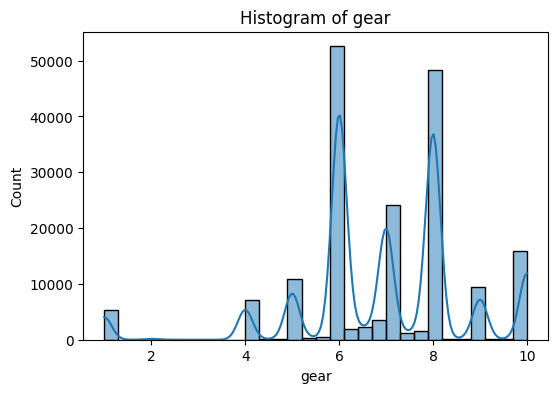

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness level of horsepower is 0.5113698998704289


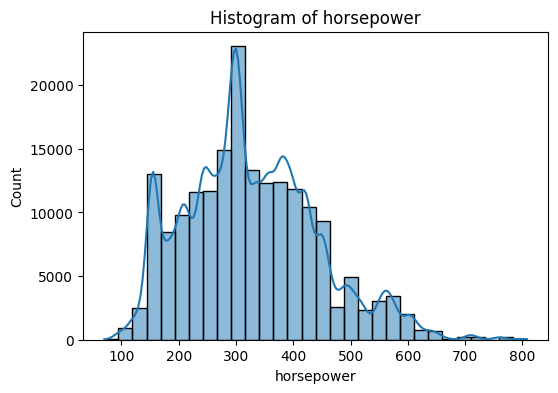

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness level of cylinders is 0.06336240678463452


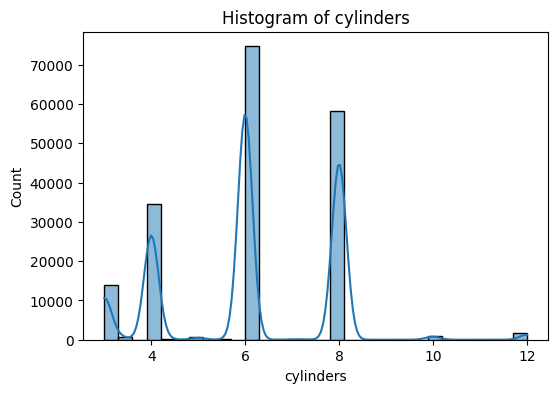

Skewness level of Price is 2.8475936957535306


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

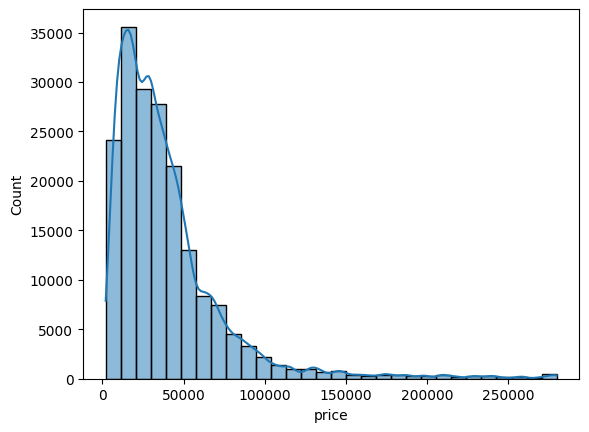

In [82]:
# Visual representation of Numerical Features of check the skewness
import seaborn as sns
import matplotlib.pyplot as plt

for col in ["milage", "gear", "horsepower", "cylinders"]:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    print(f"Skewness level of {col} is {data[col].skew()}")
    plt.title(f"Histogram of {col}")
    plt.show()
    print("="*100)
print(f"Skewness level of Price is {y.skew()}")
sns.histplot(y, kde=True, bins = 30)


* **RobustScaler: Best for handling outliers and skewed features like milage, gear, and horsepower.**
* **No Scaling: For cylinders, because it's already balanced.**
* **Log Transform: For price, because it's highly skewed and a direct regression target — so we want a linearizable relationship between features and price.**


In [83]:
#function to scale the numerical features
def scaling(X,y,features) :
    X_scaled = X.copy()
    y_scaled = np.log1p(y) # applying lop transformation on price feature
    scaler = RobustScaler()
    scaler.fit(X_scaled[features])
    X_scaled[features]= scaler.transform(X_scaled[features])
    joblib.dump(scaler,"scaler2.pkl")
    return X_scaled, y_scaled
features = ["milage","gear","horsepower"]
all_scaled,y_scaled = scaling(all_dummies,y,features)

In [84]:
y_scaled

0          8.343078
1          8.517193
2          9.539716
3         10.714440
4         11.487618
            ...    
188528    10.221978
188529    10.308986
188530    11.372525
188531    11.349241
188532    10.274913
Name: price, Length: 186020, dtype: float64

# Feature Selection

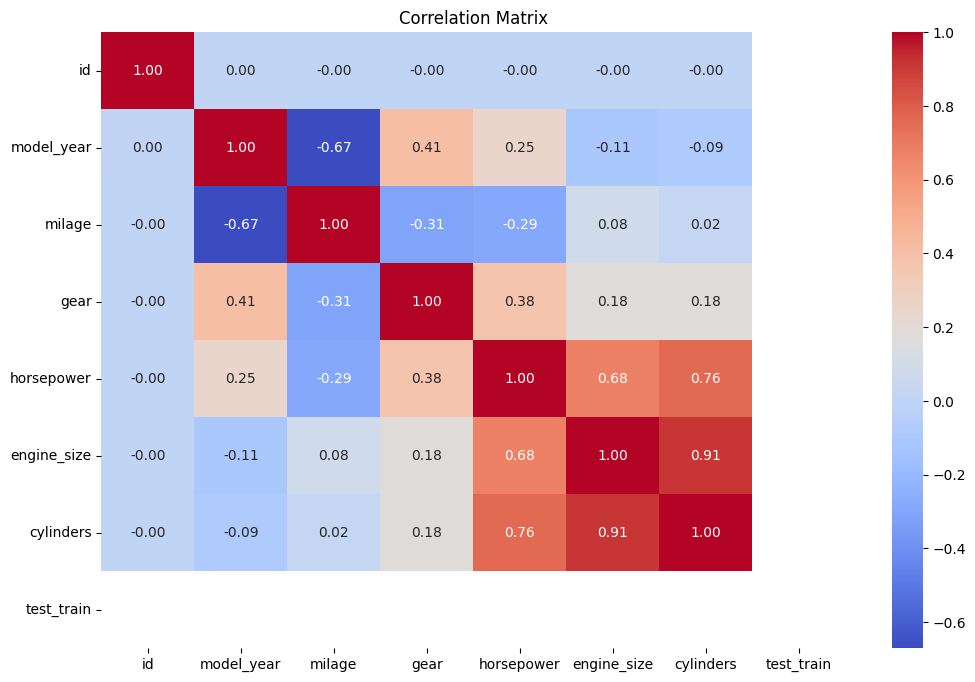

In [85]:
#Using Correlation Matrix to find the highly correlated features
# Select numerical features only
num_features = data.select_dtypes(include=[np.number])


# Compute correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(num_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [86]:
all_scaled.columns

Index(['model_year', 'milage', 'gear', 'horsepower', 'engine_size',
       'cylinders', 'test_train', 'brand_Acura', 'brand_Alfa', 'brand_Aston',
       ...
       'int_col_White / Brown', 'int_col_Yellow', 'int_col_–',
       'accident_At least 1 accident or damage reported',
       'accident_None reported', 'clean_title_No', 'clean_title_Yes',
       'trans_type_Automatic', 'trans_type_Manual', 'trans_type_Other'],
      dtype='object', length=553)

In [87]:
#As engine-size and cylinders are highly correlated with correlation of 0.91
#And cylinders is more correlated with price, we will drop cylinders
all_scaled = all_scaled.drop('engine_size',axis =1)

In [88]:
all_scaled.head(1)

,model_year,milage,gear,horsepower,cylinders,test_train,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,...,int_col_White / Brown,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_No,clean_title_Yes,trans_type_Automatic,trans_type_Manual,trans_type_Other
0,2007,2.195435,-0.5,-0.876526,4.0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


In [89]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler

#loading the datasets
X = all_scaled[all_scaled['test_train'] == 1].drop('test_train',axis =1)

# --- 1. SelectKBest using F-regression
k_freg = 100
f_selector = SelectKBest(score_func=f_regression, k=k_freg)
f_selector.fit(X, y_scaled)
f_selected = X.columns[f_selector.get_support()]

# --- 2. SelectKBest using Mutual Information Regression
k_mi = 100
mi_selector = SelectKBest(score_func=mutual_info_regression, k=k_mi)
mi_selector.fit(X, y)
mi_selected = X.columns[mi_selector.get_support()]

# --- 3. XGBoost Feature Importance
xgb_model = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
xgb_model.fit(X, y)
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
xgb_selected = xgb_importance.sort_values(ascending=False).head(100).index

# Create a DataFrame to compare
feature_union = set(f_selected) | set(mi_selected) | set(xgb_selected)
compare_df = pd.DataFrame(index=sorted(feature_union))
compare_df['F_regression'] = compare_df.index.isin(f_selected)
compare_df['Mutual_Info'] = compare_df.index.isin(mi_selected)
compare_df['XGB_Importance'] = compare_df.index.isin(xgb_selected)

# Count how many methods selected each feature
compare_df['Score'] = compare_df.sum(axis=1)

# Sort by score (i.e., how many methods selected it)
compare_df = compare_df.sort_values(by='Score', ascending=False)

# Display top features selected by at least 2 methods
selected_features = compare_df[compare_df['Score'] >= 2].index
print("Top consensus features (selected by at least 2 methods):")
print(selected_features)



Top consensus features (selected by at least 2 methods):
Index(['brand_Land', 'brand_MINI', 'model_year', 'int_col_Brown',
       'brand_Mazda', 'ext_col_–', 'fuel_type_Unknown', 'brand_Lamborghini',
       'brand_Porsche', 'brand_Tesla', 'brand_Toyota', 'clean_title_No',
       'ext_col_Red', 'cylinders', 'ext_col_Agate Black Metallic',
       'ext_col_Beluga Black', 'horsepower',
       'accident_At least 1 accident or damage reported', 'int_col_Nero Ade',
       'brand_Acura', 'brand_Dodge', 'milage', 'brand_Jeep',
       'brand_Mercedes-Benz', 'brand_Bentley', 'brand_BMW', 'ext_col_Black',
       'ext_col_Python Green', 'brand_Ford', 'int_col_Portland',
       'trans_type_Automatic', 'brand_Aston', 'trans_type_Manual',
       'ext_col_Rosso Corsa', 'ext_col_Santorini Black Metallic',
       'ext_col_Silver', 'ext_col_Silver Ice Metallic',
       'accident_None reported', 'ext_col_Blu',
       'ext_col_Bright White Clearcoat', 'brand_Chevrolet',
       'ext_col_Brilliant Silver Meta

In [90]:
len(selected_features)

83

# 5. Model Building

In [91]:
# Lets train the data
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA

In [92]:
 import xgboost as xgb

In [93]:
# Splitting the train and test data 
train = all_dummies[all_dummies.test_train == 1].drop(['test_train'], axis =1)
test = all_dummies[all_dummies.test_train == 0].drop(['test_train'], axis =1)

# Splitting train Dataset
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((148816, 552), (37204, 552))

In [102]:
# Splitting the train and test data 
train_selected = all_dummies[all_dummies.test_train == 1][selected_features]
test_selected = all_dummies[all_dummies.test_train == 0][selected_features]

# Splitting train Dataset
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(train_selected, y, test_size=0.2, random_state=42)
X_train_selected.shape, X_test_selected.shape

((148816, 83), (37204, 83))

In [94]:
# Splitting the all featured Data
train_all_featured = all_scaled[all_scaled.test_train == 1][selected_features]
test_all_featured = all_scaled[all_scaled.test_train == 0][selected_features]

# Splitting dataset train_all_featured
X_train_featured, X_test_featured, y_train_featured, y_test_featured = train_test_split(train_all_featured, y_scaled, test_size=0.2, random_state=42)
X_train_featured.shape, X_test_featured.shape

((148816, 83), (37204, 83))

In [95]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)

In [96]:
# evaluate_model function to calculate all the metrics after model training
def evaluate_model(true, predicted, log_transformed=True):
    if log_transformed:
        true = np.expm1(true)
        predicted = np.expm1(predicted)

    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    r2 = r2_score(true, predicted)
    rmse = np.sqrt(mse)
    return mae, mse, r2, rmse

In [97]:
# Model training of simple train dataset
models = {
    
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]

    # Training
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluations
    model_train_mae, model_train_mse, model_train_r2, model_train_rmse = evaluate_model(y_train, y_train_pred, log_transformed = False)
    model_test_mae, model_test_mse, model_test_r2, model_test_rmse = evaluate_model(y_test, y_test_pred, log_transformed = False)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 27775.6069
- Mean Absolute Error: 16395.1423
- R2 Score: 0.4134
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27329.6472
- Mean Absolute Error: 16270.0671
- R2 Score: 0.4052


Lasso
Model performance for Training set
- Root Mean Squared Error: 27815.4534
- Mean Absolute Error: 16403.4046
- R2 Score: 0.4118
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27302.4884
- Mean Absolute Error: 16245.8763
- R2 Score: 0.4064


Ridge
Model performance for Training set
- Root Mean Squared Error: 27776.9436
- Mean Absolute Error: 16394.5886
- R2 Score: 0.4134
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27317.2891
- Mean Absolute Error: 16262.4000
- R2 Score: 0.4058


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 23588.4009
- Mean Absolute Erro

In [98]:
print("Model Performance using Simple Dataset")
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)

Model Performance using Simple Dataset


,Model Name,R2 Score
7,CatBoosting Regressor,0.469181
6,XGBRegressor,0.462504
5,Random Forest Regressor,0.418406
1,Lasso,0.406412
2,Ridge,0.405768
0,Linear Regression,0.405230
3,K-Neighbors Regressor,0.359818
8,AdaBoost Regressor,0.271168
4,Decision Tree,-0.041283


In [99]:
# Model training Of all fetured Data
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]

    # Training
    model.fit(X_train_featured, y_train_featured)

    # Predictions
    y_train_pred = model.predict(X_train_featured)
    y_test_pred = model.predict(X_test_featured)

    # Evaluations
    model_train_mae, model_train_mse, model_train_r2, model_train_rmse = evaluate_model(y_train_featured, y_train_pred)
    model_test_mae, model_test_mse, model_test_r2, model_test_rmse = evaluate_model(y_test_featured, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 27770.4772
- Mean Absolute Error: 14156.8227
- R2 Score: 0.4137
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27180.6278
- Mean Absolute Error: 13947.7340
- R2 Score: 0.4117


Lasso
Model performance for Training set
- Root Mean Squared Error: 33636.9921
- Mean Absolute Error: 17633.1326
- R2 Score: 0.1398
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 32788.7812
- Mean Absolute Error: 17261.4075
- R2 Score: 0.1439


Ridge
Model performance for Training set
- Root Mean Squared Error: 27771.6584
- Mean Absolute Error: 14156.9935
- R2 Score: 0.4136
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27181.0197
- Mean Absolute Error: 13947.5555
- R2 Score: 0.4117


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 24677.1076
- Mean Absolute Erro

In [100]:
print("Model Performance Using Featured Dataset")
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)

Model Performance Using Featured Dataset


,Model Name,R2 Score
7,CatBoosting Regressor,0.449142
6,XGBRegressor,0.444538
5,Random Forest Regressor,0.428571
0,Linear Regression,0.411699
2,Ridge,0.411682
3,K-Neighbors Regressor,0.384944
8,AdaBoost Regressor,0.366560
1,Lasso,0.143887
4,Decision Tree,-0.096946


In [103]:
# Model training of simple train dataset
models = {
    
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]

    # Training
    model.fit(X_train_selected, y_train_selected)

    # Predictions
    y_train_pred = model.predict(X_train_selected)
    y_test_pred = model.predict(X_test_selected)

    # Evaluations
    model_train_mae, model_train_mse, model_train_r2, model_train_rmse = evaluate_model(y_train_selected, y_train_pred, log_transformed = False)
    model_test_mae, model_test_mse, model_test_r2, model_test_rmse = evaluate_model(y_test_selected, y_test_pred, log_transformed = False)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 28037.7448
- Mean Absolute Error: 16563.5622
- R2 Score: 0.4023
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27456.9818
- Mean Absolute Error: 16377.5455
- R2 Score: 0.3997


Lasso
Model performance for Training set
- Root Mean Squared Error: 28038.7953
- Mean Absolute Error: 16568.2254
- R2 Score: 0.4023
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27454.6504
- Mean Absolute Error: 16380.9782
- R2 Score: 0.3998


Ridge
Model performance for Training set
- Root Mean Squared Error: 28037.7971
- Mean Absolute Error: 16564.7427
- R2 Score: 0.4023
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27456.4130
- Mean Absolute Error: 16378.3481
- R2 Score: 0.3997


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 23574.7687
- Mean Absolute Erro

In [104]:
print("Model Performance Using selected feature")
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)

Model Performance Using selected feature


,Model Name,R2 Score
7,CatBoosting Regressor,0.470127
6,XGBRegressor,0.460753
5,Random Forest Regressor,0.408607
1,Lasso,0.399777
2,Ridge,0.399700
0,Linear Regression,0.399675
3,K-Neighbors Regressor,0.359975
8,AdaBoost Regressor,0.276428
4,Decision Tree,-0.075119


In [101]:
model = XGBRegressor()
model.fit(X_train_featured,y_train_featured)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [102]:
# Define tuning function
def tune_model(model, param_grid, X_train, y_train, name):
    search = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter=30,
        cv=3,
        scoring='r2',
        n_jobs=-1,
        verbose=2,
        random_state=42
    )
    search.fit(X_train, y_train)
    print(f"Best score for {name}: {search.best_score_}")
    print(f"Best params for {name}: {search.best_params_}")
    return search.best_estimator_

# Diverse Param Grids
param_grids = {
    "CatBoost": {
        'iterations': [300, 500, 800, 1000],
        'depth': [4, 6, 8, 10],
        'learning_rate': [0.01, 0.03, 0.05, 0.1],
        'l2_leaf_reg': [1, 3, 5, 7, 9],
        'subsample': [0.7, 0.8, 1.0]
    },
    "XGBoost": {
        'n_estimators': [300, 500, 800, 1000],
        'max_depth': [4, 6, 8, 10],
        'learning_rate': [0.01, 0.03, 0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'reg_lambda': [0, 1, 3, 5],
        'reg_alpha': [0, 0.5, 1, 3]
    }
}

# Run tuning
best_catboost = tune_model(CatBoostRegressor(verbose=False), param_grids["CatBoost"], X_train_featured, y_train_featured, "CatBoost")
print('='*100)
best_xgb = tune_model(XGBRegressor(verbosity=0), param_grids["XGBoost"], X_train_featured, y_train_featured, "XGBoost")
print('='*100)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END depth=6, iterations=1000, l2_leaf_reg=9, learning_rate=0.1, subsample=0.7; total time=  39.7s
[CV] END depth=10, iterations=500, l2_leaf_reg=9, learning_rate=0.05, subsample=1.0; total time=  53.5s
[CV] END depth=10, iterations=500, l2_leaf_reg=9, learning_rate=0.05, subsample=1.0; total time=  53.9s
[CV] END depth=10, iterations=500, l2_leaf_reg=9, learning_rate=0.05, subsample=1.0; total time=  55.2s
[CV] END depth=6, iterations=500, l2_leaf_reg=9, learning_rate=0.01, subsample=1.0; total time=  21.7s
[CV] END depth=6, iterations=500, l2_leaf_reg=9, learning_rate=0.01, subsample=1.0; total time=  20.8s
[CV] END depth=6, iterations=1000, l2_leaf_reg=9, learning_rate=0.1, subsample=0.7; total time=  37.6s
[CV] END depth=6, iterations=1000, l2_leaf_reg=9, learning_rate=0.1, subsample=0.7; total time=  38.0s
[CV] END depth=6, iterations=500, l2_leaf_reg=9, learning_rate=0.01, subsample=1.0; total time=  21.3s
[CV] END 

In [106]:
import joblib

# Save the trained model
joblib.dump(model, 'model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save all dummy columns used after get_dummies
joblib.dump(all_dummies.columns.tolist(), 'dummy_columns.pkl')

# Save selected features used for model training (top k features)
joblib.dump(X_train_featured.columns.tolist(), 'selected_features.pkl')


['selected_features.pkl']